!!!! IMPORTANT NOTE !!!!
Phase 1 and the first 3 code cells of Phase 2 must be ran before running Phase 3. It imports the data and normalizes it. It is not required to run all of Phase 2 in order to run Phase 3.

# PHASE I




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.utils.vis_utils import plot_model



Bringing in the data file to assign as the dataset

---



In [ ]:
#file_name = 'adult1.csv'
#files.upload()

#read the data to dataset
url = 'https://raw.githubusercontent.com/pango3001/AI/main/project/adult1.csv'

dataset = pd.read_csv(url, delimiter=',')

Making sure our data has the right height and width

In [ ]:
# print off rows and columns to make sure the dimensions are correct
print("Rows: %s" % dataset.shape[0])
print("Columns: %s" % dataset.shape[1])

# head shows the first n amount of rows, in this case n=10
dataset.head(10)

Rows: 32561
Columns: 14


,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0
5,37,1,284582,14,14,1,2,1,0,0,0,40,1,0
6,49,1,160187,4,5,3,0,2,0,0,0,16,2,0
7,52,2,209642,10,9,1,1,1,1,0,0,45,1,1
8,31,1,45781,14,14,0,0,1,0,14084,0,50,1,1
9,42,1,159449,13,13,1,1,1,1,5178,0,40,1,1


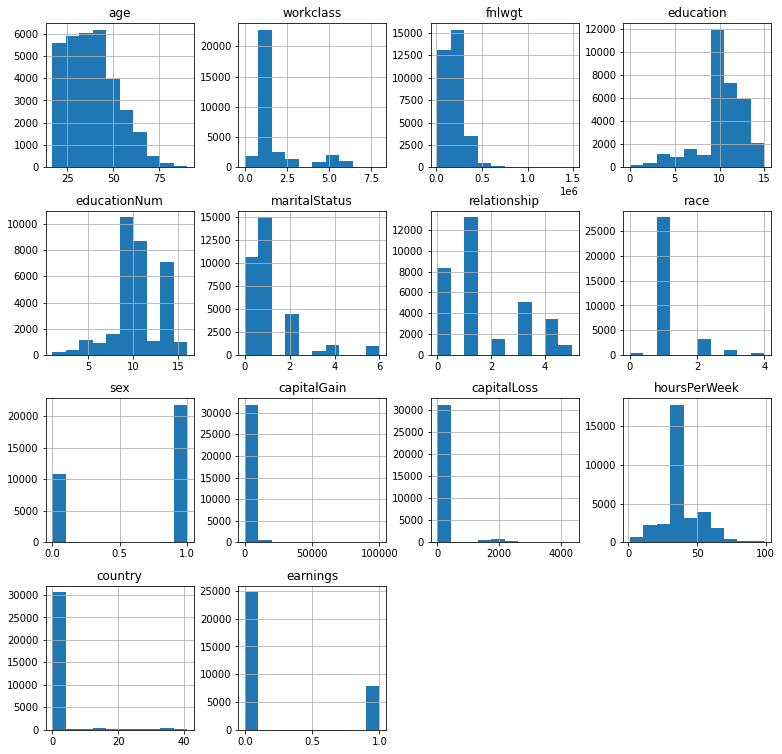

In [ ]:
plt.rcParams["figure.figsize"] = ((13,13))
dataset.hist()
plt.show()

In [ ]:
dataset.describe()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.622401,1.897784e+05,10.214766,10.080679,1.083781,1.542397,1.180093,0.669205,1077.648844,87.303830,40.437456,2.305580,0.240810
std,13.640433,1.443345,1.055500e+05,2.692418,2.572720,1.251381,1.437431,0.534266,0.470506,7385.292085,402.960219,12.347429,5.594557,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178270e+05,10.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,1.783560e+05,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,1.000000,2.370510e+05,11.000000,12.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


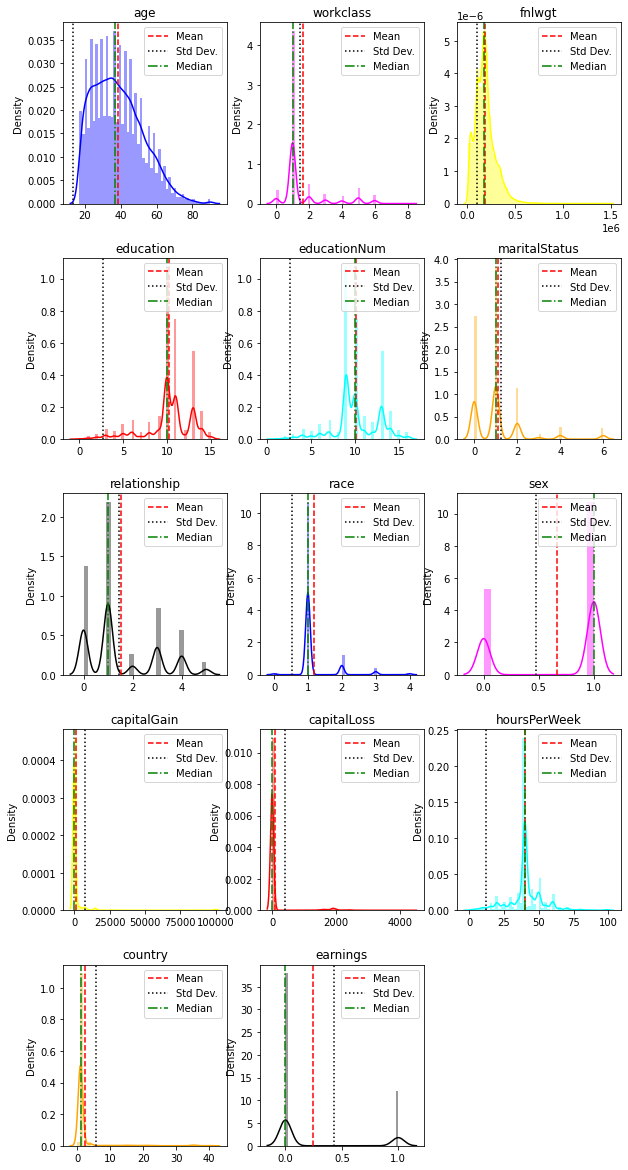

In [ ]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'country', 'earnings']
c_length  = len(columns)
c_colors  = ["blue", "magenta", "yellow", "red", "cyan", "orange", "black", "blue", "magenta", "yellow", "red", "cyan", "orange", "black"]

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 25))
for i, j, k in itertools.zip_longest(columns, range(c_length), c_colors):
    plt.subplot(6, 3, j+1)
    sns.distplot(dataset[i], color = k)
    plt.title(i) # Title of column represented
    plt.xlabel("") # clears the x axis label
    plt.subplots_adjust(hspace = 0.3)
    plt.axvline(dataset[i].mean(), color = "red", linestyle="dashed", label="Mean")
    plt.axvline(dataset[i].std(), color = "black", linestyle="dotted", label="Std Dev.")
    plt.axvline(dataset[i].median(), color = "green", linestyle="dashdot", label="Median")
    plt.legend(loc="upper right")

Text(0, 0.5, 'Amount')

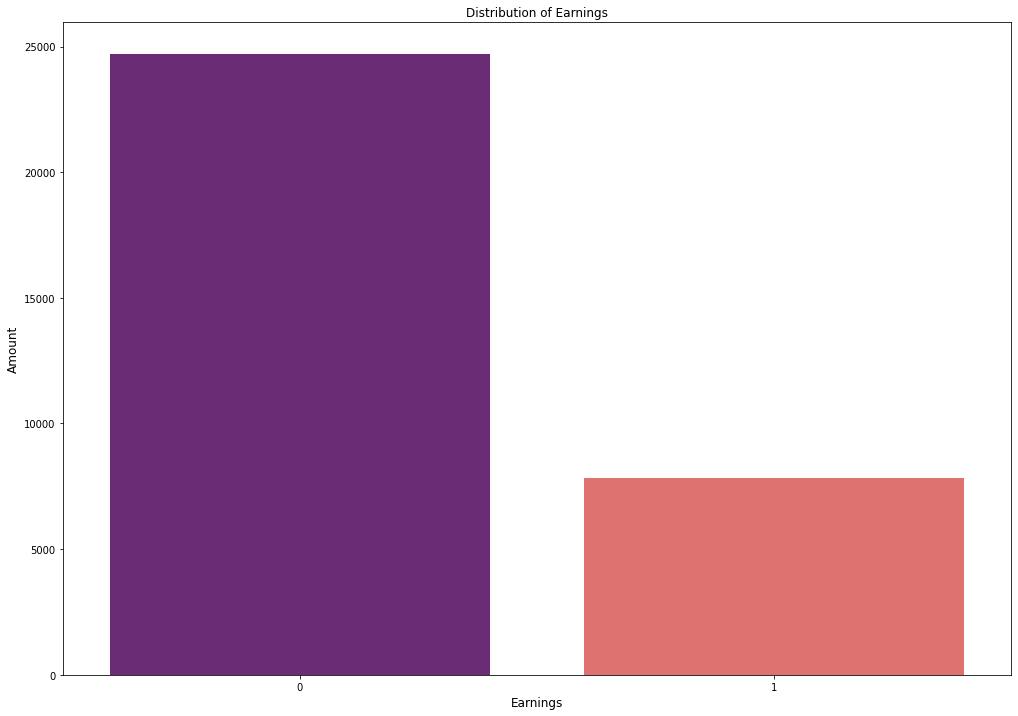

In [ ]:
# Distribution of Math Scores
plt.figure(figsize=(17, 12))
axs = sns.countplot(dataset['earnings'], palette='magma')
plt.title('Distribution of Earnings', fontsize=12)
plt.xlabel('Earnings', fontsize=12)
plt.ylabel('Amount', fontsize=12)

Next I will create a correlation map

Honestly I may change my dataset after looking at this, I would like to see more variation

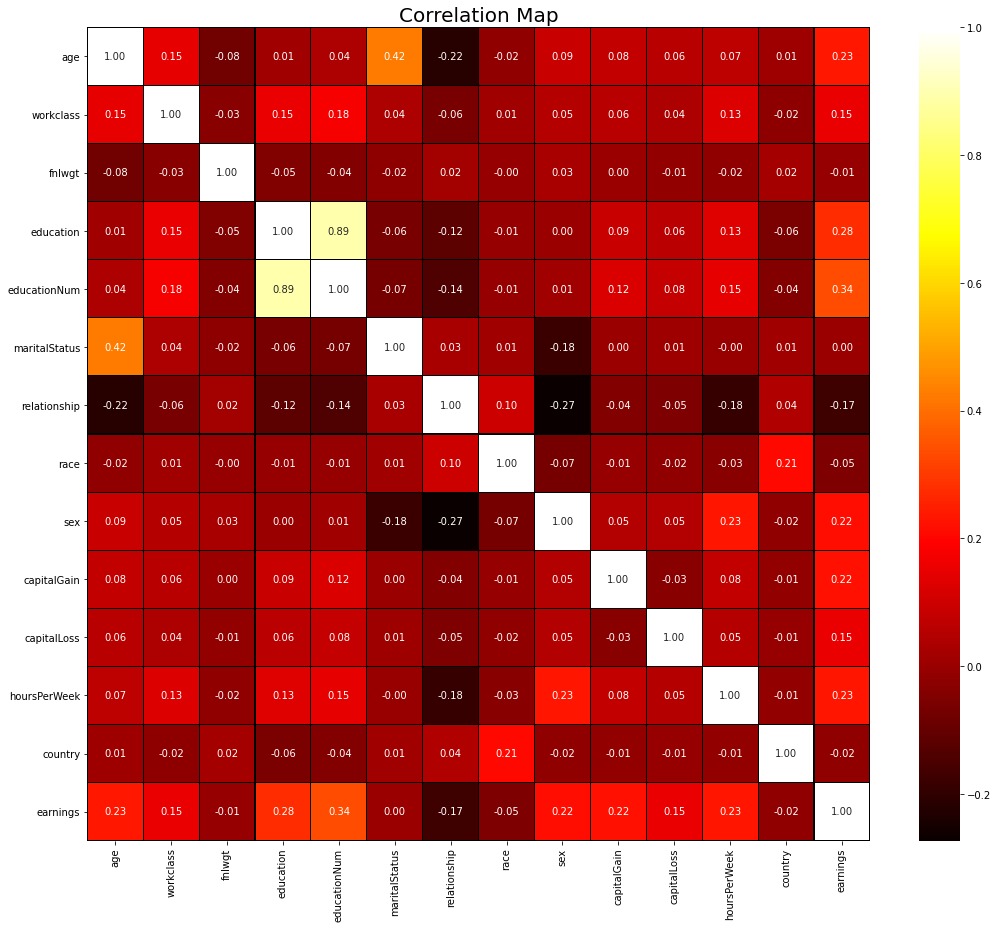

In [ ]:
# Correlation
plt.figure(figsize=(15, 13))
sns.heatmap(data=dataset.corr(), annot=True, cmap="hot", linewidths=0.1, fmt=".2f", linecolor="black")
plt.title("Correlation Map", fontsize=20)
plt.tight_layout()
plt.show()

# Honestly I may change my dataset after looking at this, I would like to see more variation

In [ ]:
from sklearn import preprocessing
# Normalizing data between (0-1)
x = dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Insert column names back into data
normalized_df = pd.DataFrame(x_scaled, columns=dataset.columns)


# Output the first 10 rows to check data is normalized
normalized_df.head(10)


,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,0.301370,0.375,0.044302,0.866667,0.800000,0.000000,0.0,0.25,1.0,0.021740,0.0,0.397959,0.024390,0.0
1,0.452055,0.250,0.048238,0.866667,0.800000,0.166667,0.2,0.25,1.0,0.000000,0.0,0.122449,0.024390,0.0
2,0.287671,0.125,0.138113,0.666667,0.533333,0.333333,0.0,0.25,1.0,0.000000,0.0,0.397959,0.024390,0.0
3,0.493151,0.125,0.151068,0.400000,0.400000,0.166667,0.2,0.50,1.0,0.000000,0.0,0.397959,0.024390,0.0
4,0.150685,0.125,0.221488,0.866667,0.800000,0.166667,0.4,0.50,0.0,0.000000,0.0,0.397959,0.341463,0.0
5,0.273973,0.125,0.184932,0.933333,0.866667,0.166667,0.4,0.25,0.0,0.000000,0.0,0.397959,0.024390,0.0
6,0.438356,0.125,0.100448,0.266667,0.266667,0.500000,0.0,0.50,0.0,0.000000,0.0,0.153061,0.048780,0.0
7,0.479452,0.250,0.134036,0.666667,0.533333,0.166667,0.2,0.25,1.0,0.000000,0.0,0.448980,0.024390,1.0
8,0.191781,0.125,0.022749,0.933333,0.866667,0.000000,0.0,0.25,0.0,0.140841,0.0,0.500000,0.024390,1.0
9,0.342466,0.125,0.099947,0.866667,0.800000,0.166667,0.2,0.25,1.0,0.051781,0.0,0.397959,0.024390,1.0


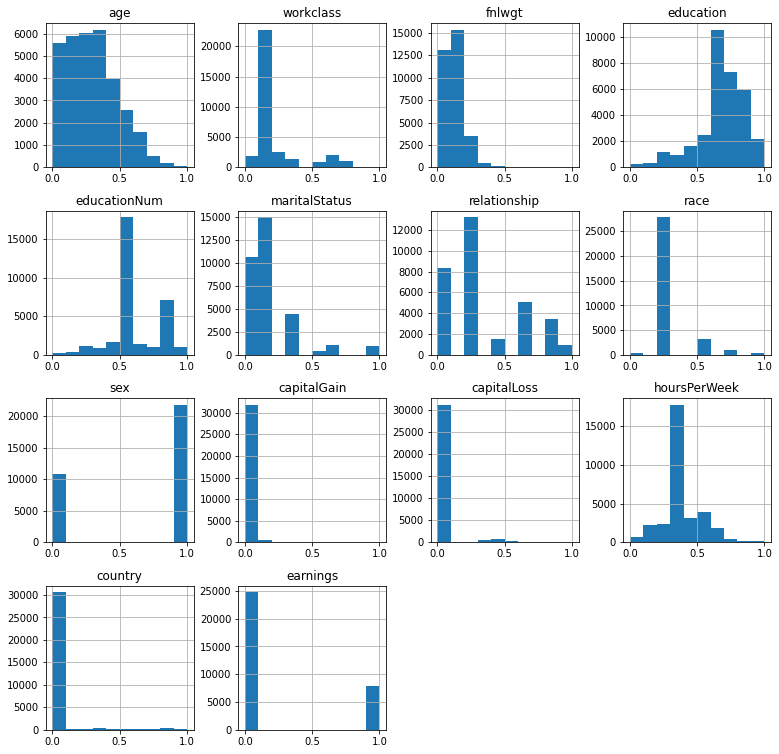

In [ ]:
normalized_df.hist()
plt.show()

#Illistrating the Nueral Networks


In [ ]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    #source: https://gist.github.com/craffel/2d727968c3aaebd10359
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

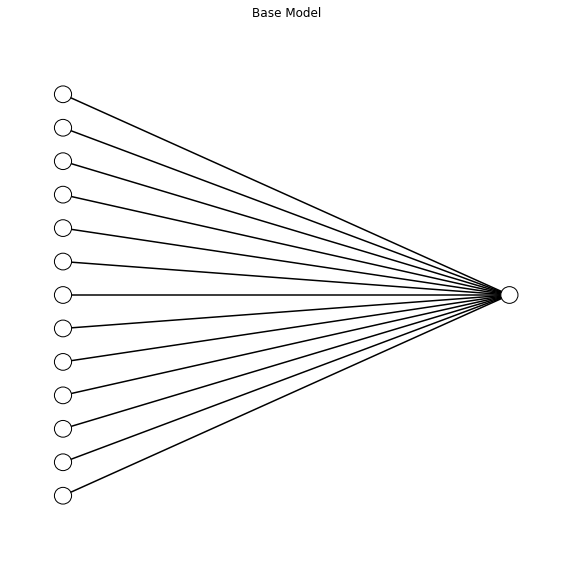

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Base Model")
draw_neural_net(ax, .1, .9, .1, .9, [13, 1])

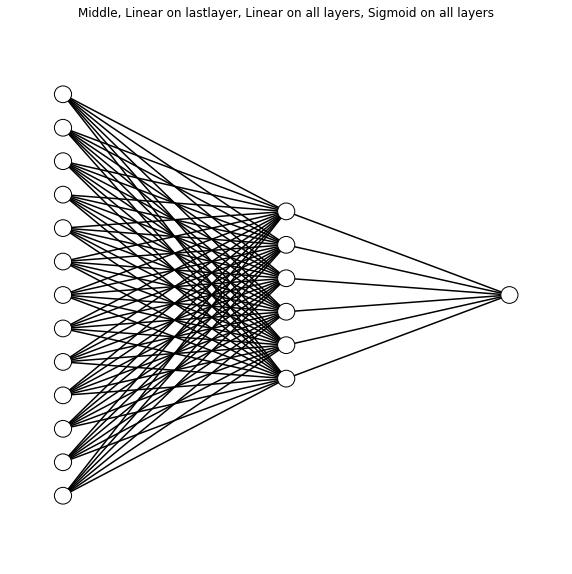

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Middle, Linear on lastlayer, Linear on all layers, Sigmoid on all layers")
draw_neural_net(ax, .1, .9, .1, .9, [13,6, 1])

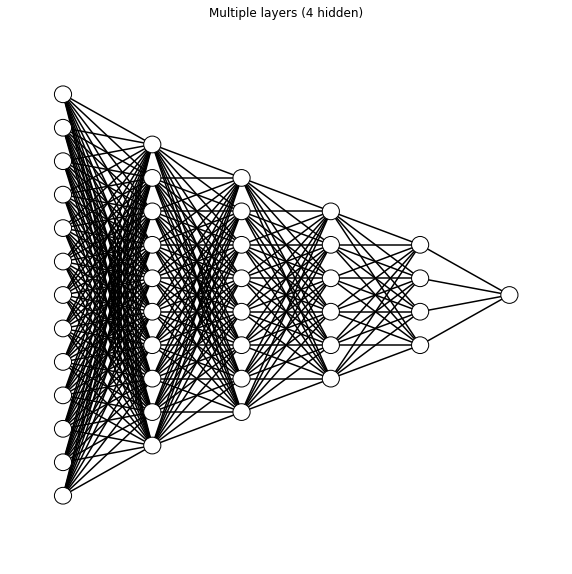

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Multiple layers (4 hidden)")
draw_neural_net(ax, .1, .9, .1, .9, [13,10,8,6,4, 1])

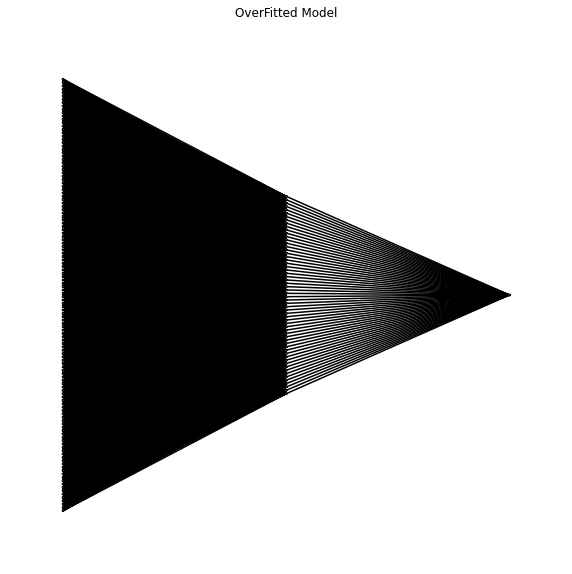

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("OverFitted Model")
draw_neural_net(ax, .1, .9, .1, .9, [130,60, 1])

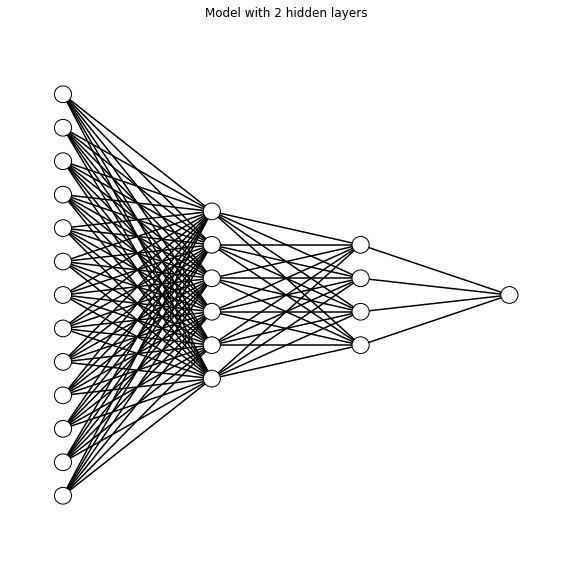

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Model with 2 hidden layers")
draw_neural_net(ax, .1, .9, .1, .9, [13,6,4,1])

# PHASE II

Splitting my data into training and validation sets

In [ ]:
# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas DataSet to Numpy Array
dataset_np = dataset.values
X = dataset.drop('earnings', axis='columns').values
Y = dataset['earnings'].values

In [ ]:
# Index for 30%
index_30percent = int(0.3 * len(dataset_np[:, 0]))  
print(index_30percent)

# Split into validation (30%) and training (70%)
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]
XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

9768


In [ ]:
# Mean normalization
Xmin = XTRAIN.min(axis = 0) 
Xmax = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (Xmax - Xmin)
XVALID = (XVALID - mean) / (Xmax - Xmin)

# Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

In [ ]:
train_norm = pd.DataFrame(data=XTRAIN)
train_norm.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'country']
train_norm.hist(figsize=(18,16))

Next we will set up the models

In [ ]:
# Setting up the models

# Base model 1 input, 1 output
model_base = Sequential([ 
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding a middle layer
model_middle = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding another hidden layer
model_4_layers = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding multiple hidden layers
model_mult_layers = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=10, activation='relu'),
                    Dense(units=8, activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# linear activation on last layer
model_linear_last = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='linear')
])

# linear activation on all layers
model_linear_all = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='linear'),
                    Dense(units=6, activation='linear'),
                    Dense(units=1, activation='linear')
])

# sigmoid activation on all layers
model_sigmoid_all = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='sigmoid'),
                    Dense(units=6, activation='sigmoid'),
                    Dense(units=1, activation='sigmoid')
])

# Overfitted model
model_overfitted = Sequential([
                    Dense(units=120, input_dim = len(XTRAIN[0, :]), activation='linear'),
                    Dense(units=60, activation='linear'),
                    Dense(units=1, activation='linear')
])




In [ ]:
model_base.summary()

Now we must compile each model to prepare it for the .fit() function

In [ ]:
model_base.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_middle.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_4_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_mult_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_last.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_sigmoid_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_overfitted.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Learn the model from training set
history1 = model_base.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

In [ ]:
history2 = model_middle.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

In [ ]:
history3 = model_4_layers.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

In [ ]:
history4 = model_mult_layers.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

In [ ]:
history5 = model_linear_last.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

In [ ]:
history6 = model_linear_all.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

In [ ]:
history7 = model_sigmoid_all.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

In [ ]:
history8 = model_overfitted.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

In [ ]:
def get_accuracy(model):
    scores = model.evaluate(XTRAIN, YTRAIN)
    percent = (scores[1] * 100.0)
    formatted_percent = "{:.2f}".format(percent)
    print("Training set Accuracy: ", formatted_percent , "%")

In [ ]:
get_accuracy(model_base)

In [ ]:
get_accuracy(model_middle)

In [ ]:
get_accuracy(model_mult_layers)

In [ ]:
get_accuracy(model_4_layers)

In [ ]:
get_accuracy(model_linear_last)

In [ ]:
get_accuracy(model_linear_all)

In [ ]:
get_accuracy(model_sigmoid_all)

In [ ]:
get_accuracy(model_overfitted)

In [ ]:
def learning_curve(m_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(m_history.history['loss'])
    ax1.plot(m_history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Training loss data', 'Validation loss data'], loc='upper right')

    ax2.plot(m_history.history['accuracy'])
    ax2.plot(m_history.history['val_accuracy'])
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Training accuracy data', 'Validation accuracy data'], loc='lower right')

    fig.show()

In [ ]:
learning_curve(history1)

In [ ]:
learning_curve(history2)

In [ ]:
learning_curve(history3)

In [ ]:
learning_curve(history4)

In [ ]:
learning_curve(history5)

In [ ]:
learning_curve(history6)

In [ ]:
learning_curve(history7)

In [ ]:
learning_curve(history8)

In [ ]:
plot_model(model_base, show_shapes=True, show_layer_names=True)

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 7, 2])


#PHASE III

In [ ]:
# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas DataSet to Numpy Array
dataset_np = dataset.values
X = dataset.drop('earnings', axis='columns').values
Y = dataset['earnings'].values
outCol = len(dataset_np[0]) - 1

In [ ]:
def learning_curve(m_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(m_history.history['loss'])
    ax1.plot(m_history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Training loss data', 'Validation loss data'], loc='upper right')

    ax2.plot(m_history.history['accuracy'])
    ax2.plot(m_history.history['val_accuracy'])
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Training accuracy data', 'Validation accuracy data'], loc='lower right')

    fig.show()

Model with all features

In [ ]:
callback_a_rem = ModelCheckpoint(filepath = 'modelRem.hdf5', monitor = 'val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b_rem = EarlyStopping(monitor = 'val_accuracy', mode = 'max' , patience = 20, verbose = 0)

model = Sequential()
model.add(Dense(units=13, input_dim = 13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 100 , batch_size=32, verbose = 1, callbacks = [callback_a_rem, callback_b_rem])

Epoch 1/100
670/713 [===========================>..] - ETA: 0s - loss: 0.4896 - accuracy: 0.7495
Epoch 00001: val_accuracy improved from -inf to 0.81532, saving model to modelRem.hdf5
713/713 [==============================] - 1s 1ms/step - loss: 0.4846 - accuracy: 0.7527 - val_loss: 0.4068 - val_accuracy: 0.8153
Epoch 2/100
674/713 [===========================>..] - ETA: 0s - loss: 0.3902 - accuracy: 0.8209
Epoch 00002: val_accuracy improved from 0.81532 to 0.83108, saving model to modelRem.hdf5
713/713 [==============================] - 1s 1ms/step - loss: 0.3907 - accuracy: 0.8205 - val_loss: 0.3721 - val_accuracy: 0.8311
Epoch 3/100
677/713 [===========================>..] - ETA: 0s - loss: 0.3637 - accuracy: 0.8333
Epoch 00003: val_accuracy improved from 0.83108 to 0.84204, saving model to modelRem.hdf5
713/713 [==============================] - 1s 1ms/step - loss: 0.3632 - accuracy: 0.8331 - val_loss: 0.3552 - val_accuracy: 0.8420
Epoch 4/100
668/713 [===========================>

In [ ]:
def get_accuracy(model):
    scores = model.evaluate(XTRAIN, YTRAIN)
    percent = (scores[1] * 100.0)
    formatted_percent = "{:.2f}".format(percent)
    print("Training set Accuracy: ", formatted_percent , "%")

In [ ]:
get_accuracy(model)

713/713 [==============================] - 1s 794us/step - loss: 0.3195 - accuracy: 0.8501
Training set Accuracy:  85.01 %


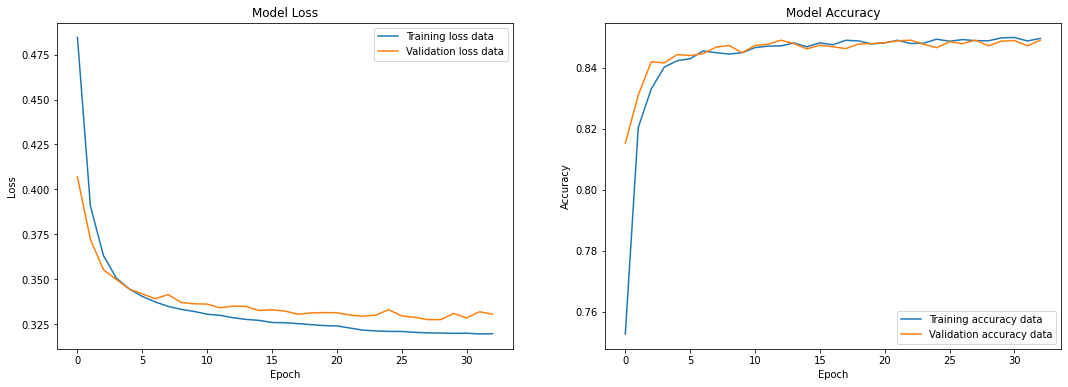

In [ ]:
learning_curve(history)

###Importance of each feature



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dictRem = {}

for i in range(len(XTRAIN[0])):
  print("Running... ({} / {})".format(i+1, len(XTRAIN[0])))
  # Refresh file for every run
  callback_a_rem = ModelCheckpoint(filepath = 'modelRem.hdf5', monitor = 'val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
  callback_b_rem = EarlyStopping(monitor = 'val_accuracy', mode = 'max' , patience = 20, verbose = 0)

  # Model
  modelRem = Sequential()
  modelRem.add(Dense(1, input_dim = 1, activation='sigmoid'))
  modelRem.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
  historyRem = modelRem.fit(XTRAIN[:, i], YTRAIN, validation_data=(XVALID[:, i], YVALID), epochs = 100 , batch_size=32, verbose = 0, callbacks = [callback_a_rem, callback_b_rem])

  modelRem.load_weights('modelRem.hdf5')
  predictionRem = modelRem.predict(XVALID[:, i])
  dictRem['{}'.format(i)] = accuracy_score(YVALID, predictionRem.round())

Running... (1 / 13)

Epoch 00001: val_accuracy improved from -inf to 0.76556, saving model to modelRem.hdf5

Epoch 00002: val_accuracy did not improve from 0.76556

Epoch 00003: val_accuracy did not improve from 0.76556

Epoch 00004: val_accuracy did not improve from 0.76556

Epoch 00005: val_accuracy did not improve from 0.76556

Epoch 00006: val_accuracy did not improve from 0.76556

Epoch 00007: val_accuracy did not improve from 0.76556

Epoch 00008: val_accuracy did not improve from 0.76556

Epoch 00009: val_accuracy did not improve from 0.76556

Epoch 00010: val_accuracy did not improve from 0.76556

Epoch 00011: val_accuracy did not improve from 0.76556

Epoch 00012: val_accuracy did not improve from 0.76556

Epoch 00013: val_accuracy did not improve from 0.76556

Epoch 00014: val_accuracy did not improve from 0.76556

Epoch 00015: val_accuracy did not improve from 0.76556

Epoch 00016: val_accuracy did not improve from 0.76556

Epoch 00017: val_accuracy did not improve from 0.76

In [ ]:
sortedDict = {}
for key, value in sorted(dictRem.items(), key=lambda x: x[1]):
  print("Feature", key, ":", value)
  sortedDict[key] = value

Feature 0 : 0.7655610155610155
Feature 1 : 0.7655610155610155
Feature 2 : 0.7655610155610155
Feature 5 : 0.7655610155610155
Feature 6 : 0.7655610155610155
Feature 7 : 0.7655610155610155
Feature 8 : 0.7655610155610155
Feature 11 : 0.7655610155610155
Feature 12 : 0.7655610155610155
Feature 3 : 0.7722153972153972
Feature 10 : 0.7777436527436528
Feature 4 : 0.7830671580671581
Feature 9 : 0.8057944307944308


In [ ]:
colNames = list(dataset.columns)
inputNames = colNames[:-1]
sortedLabels =[]
def getList(dict): 
    return list(dict.keys()) 
      
remCols = (getList(sortedDict))

for i in remCols:
  print(i)
  sortedLabels.append(inputNames[int(i)])

0
1
2
5
6
7
8
11
12
3
10
4
9


In [ ]:
print("Sorted cols: ", remCols)
print("Sorted col label: ", sortedLabels)

Sorted cols:  ['0', '1', '2', '5', '6', '7', '8', '11', '12', '3', '10', '4', '9']
Sorted col label:  ['age', 'workclass', 'fnlwgt', 'maritalStatus', 'relationship', 'race', 'sex', 'hoursPerWeek', 'country', 'education', 'capitalLoss', 'educationNum', 'capitalGain']


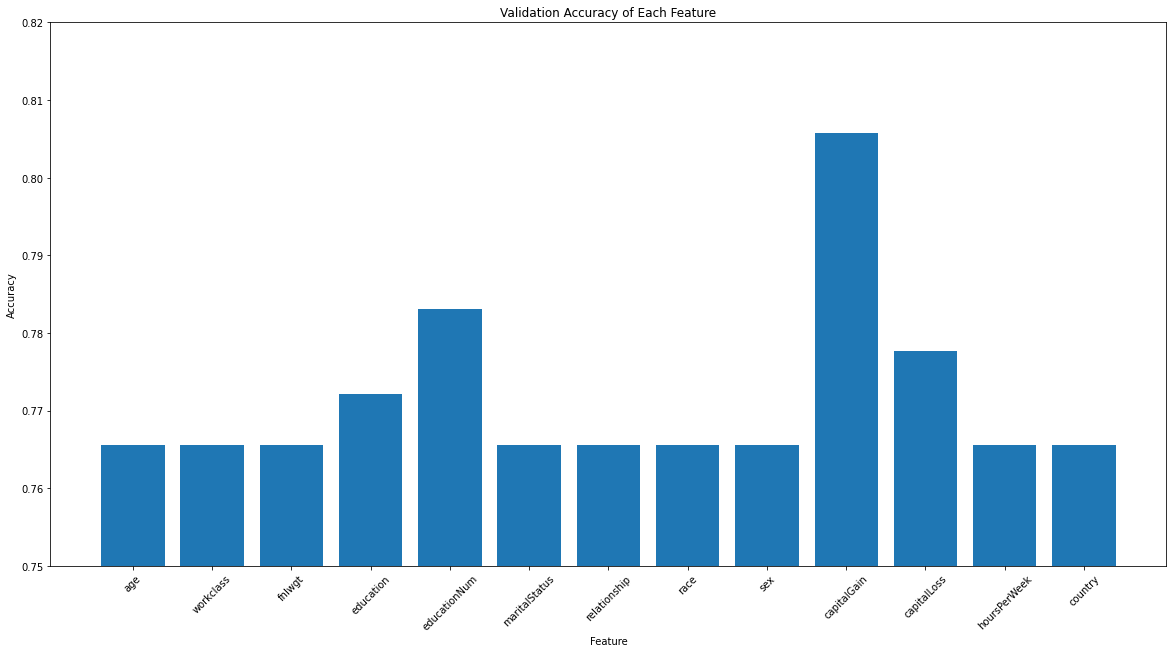

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 936x936 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(range(len(dictRem)), list(dictRem.values()), align='center')
plt.xticks(range(len(dictRem)), inputNames, rotation = 45)
plt.ylim(.75, .82)
plt.ylabel('Accuracy')
plt.xlabel('Feature')
plt.title('Validation Accuracy of Each Feature')
plt.show()

###Reduction

In [ ]:
numCols = len(XTRAIN[0])
inCols = [i for i in range(numCols)]
dictRemIt = {}

print(inCols)
print(remCols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
['0', '1', '2', '5', '6', '7', '8', '11', '12', '3', '10', '4', '9']


In [ ]:
numCols = len(XTRAIN[0])
inCols = [i for i in range(numCols)]
dictRemIt = {}

# Loop through code removing 1 feature at a time, in order of remCols as determined by validation accuracy of each single feature
for i in range(numCols):
  print("Running... ({} / {})".format(i+1, numCols))
  callback_a_rem = ModelCheckpoint(filepath = 'modelRemIt.hdf5', monitor = 'val_accuracy', save_best_only = True, save_weights_only = True, verbose = 0)
  callback_b_rem = EarlyStopping(monitor = 'val_accuracy', mode = 'max' , patience = 20, verbose = 0)

  modelRemIt = Sequential()
  modelRemIt.add(Dense(1, input_dim = outCol - i, activation='relu'))
  modelRemIt.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
  historyRemIt = modelRemIt.fit(XTRAIN[:,  inCols], YTRAIN, validation_data=(XVALID[:, inCols], YVALID), epochs = 100, batch_size=32, verbose = 0, callbacks = [callback_a_rem, callback_b_rem])

  

  modelRemIt.load_weights('modelRemIt.hdf5')
  predictionRemIt = modelRemIt.predict(XVALID[:, inCols])
  dictRemIt['Removed Feature {}'.format(sortedLabels[i])] = accuracy_score(YVALID, predictionRemIt.round())

  inCols.remove(int(remCols[i]))
  print("Removing colomn {}".format(sortedLabels[i]))

Running... (1 / 13)
Removing colomn age
Running... (2 / 13)
Removing colomn workclass
Running... (3 / 13)
Removing colomn fnlwgt
Running... (4 / 13)
Removing colomn maritalStatus
Running... (5 / 13)
Removing colomn relationship
Running... (6 / 13)
Removing colomn race
Running... (7 / 13)
Removing colomn sex
Running... (8 / 13)
Removing colomn hoursPerWeek
Running... (9 / 13)
Removing colomn country
Running... (10 / 13)
Removing colomn education
Running... (11 / 13)
Removing colomn capitalLoss
Running... (12 / 13)
Removing colomn educationNum
Running... (13 / 13)
Removing colomn capitalGain


In [ ]:
for key, value in sorted(dictRemIt.items(), key=lambda x: x[1]):
  print(key, ":", value)

Removed Feature capitalGain : 0.8022113022113022
Removed Feature educationNum : 0.8048730548730548
Removed Feature education : 0.8085585585585585
Removed Feature capitalLoss : 0.8088656838656839
Removed Feature country : 0.8107084357084358
Removed Feature hoursPerWeek : 0.8124488124488124
Removed Feature maritalStatus : 0.8128583128583129
Removed Feature fnlwgt : 0.8138820638820639
Removed Feature relationship : 0.8148034398034398
Removed Feature race : 0.8151105651105651
Removed Feature sex : 0.8152129402129402
Removed Feature workclass : 0.8167485667485668
Removed Feature age : 0.8196150696150696


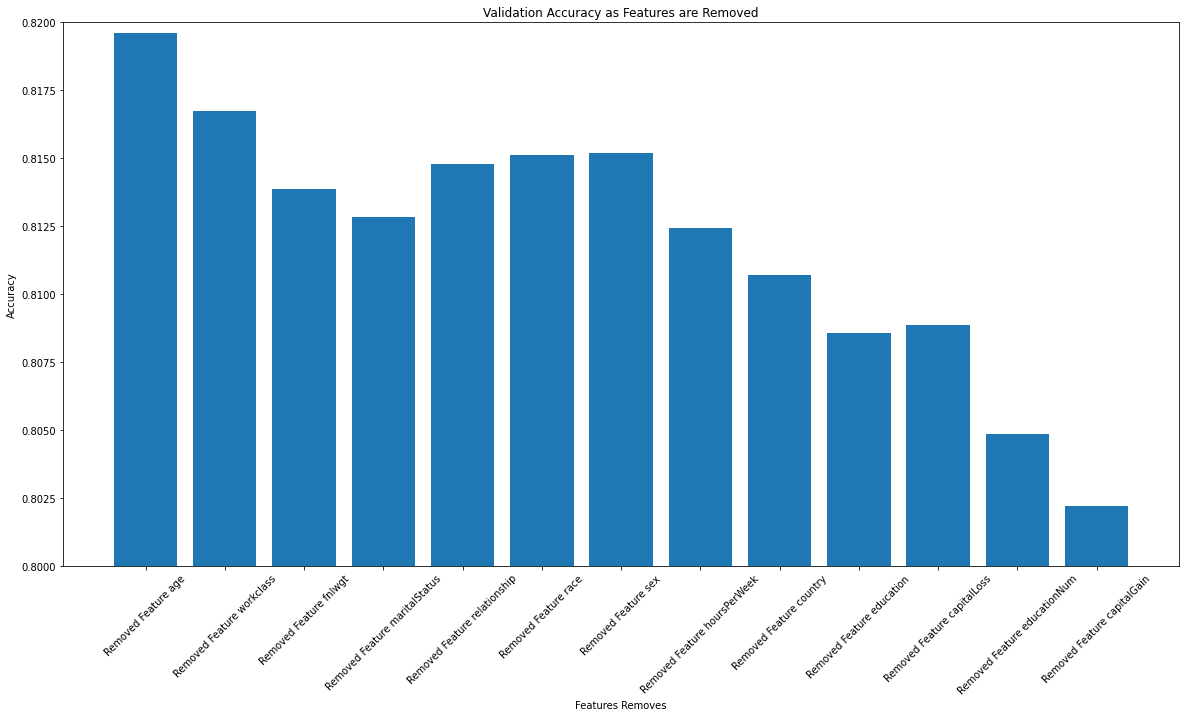

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(range(len(dictRemIt)), list(dictRemIt.values()), align='center')
plt.xticks(range(len(dictRemIt)), list(dictRemIt.keys()), rotation = 45)
plt.ylim(.8, .82)
plt.ylabel('Accuracy')
plt.xlabel('Features Removes')
plt.title('Validation Accuracy as Features are Removed')

plt.show()

###All layers with  1 feature removed

In [ ]:
# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas DataSet to Numpy Array
dataset_np = dataset.values

#REMOVAL OF UNWANTED FEATURES
X = dataset.drop(['earnings','relationship'], axis='columns').values
Y = dataset['earnings'].values

In [ ]:
# Index for 30%
index_30percent = int(0.3 * len(dataset_np[:, 0]))  
print(index_30percent)

# Split into validation (30%) and training (70%)
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]
XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

# Mean normalization
Xmin = XTRAIN.min(axis = 0) 
Xmax = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (Xmax - Xmin)
XVALID = (XVALID - mean) / (Xmax - Xmin)

# Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

9768


In [ ]:
callback_a_rem = ModelCheckpoint(filepath = 'modelRem.hdf5', monitor = 'val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b_rem = EarlyStopping(monitor = 'val_accuracy', mode = 'max' , patience = 20, verbose = 0)

modelR1 = Sequential()
modelR1.add(Dense(units=len(XTRAIN[0, :]), input_dim = len(XTRAIN[0, :]), activation='relu'))
modelR1.add(Dense(6, activation='relu'))
modelR1.add(Dense(4, activation='relu'))
modelR1.add(Dense(1, activation='sigmoid'))
modelR1.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
historyR1 = modelR1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 100 , batch_size=32, verbose = 1, callbacks = [callback_a_rem, callback_b_rem])

Epoch 1/100
708/713 [============================>.] - ETA: 0s - loss: 0.5109 - accuracy: 0.7525
Epoch 00001: val_accuracy improved from -inf to 0.75461, saving model to modelRem.hdf5
713/713 [==============================] - 1s 1ms/step - loss: 0.5104 - accuracy: 0.7526 - val_loss: 0.4329 - val_accuracy: 0.7546
Epoch 2/100
679/713 [===========================>..] - ETA: 0s - loss: 0.4119 - accuracy: 0.7927
Epoch 00002: val_accuracy improved from 0.75461 to 0.81450, saving model to modelRem.hdf5
713/713 [==============================] - 1s 1ms/step - loss: 0.4128 - accuracy: 0.7926 - val_loss: 0.4022 - val_accuracy: 0.8145
Epoch 3/100
709/713 [============================>.] - ETA: 0s - loss: 0.3867 - accuracy: 0.8211
Epoch 00003: val_accuracy improved from 0.81450 to 0.82351, saving model to modelRem.hdf5
713/713 [==============================] - 1s 1ms/step - loss: 0.3869 - accuracy: 0.8210 - val_loss: 0.3793 - val_accuracy: 0.8235
Epoch 4/100
661/713 [==========================>.

In [ ]:
get_accuracy(modelR1)

713/713 [==============================] - 1s 798us/step - loss: 0.3162 - accuracy: 0.8541
Training set Accuracy:  85.41 %


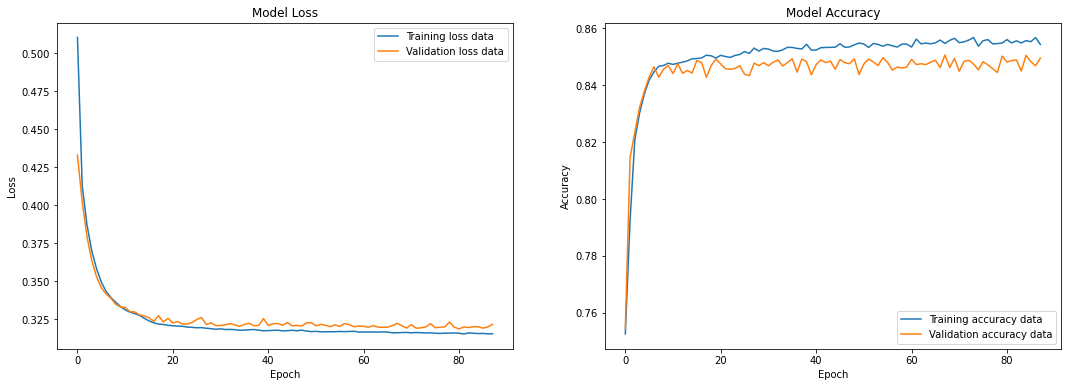

In [ ]:
learning_curve(historyR1)

###All layers with features removed

In [ ]:
# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas DataSet to Numpy Array
dataset_np = dataset.values

#REMOVAL OF UNWANTED FEATURES
X = dataset.drop(['earnings','relationship','race','sex'], axis='columns').values
Y = dataset['earnings'].values

In [ ]:
# Index for 30%
index_30percent = int(0.3 * len(dataset_np[:, 0]))  
print(index_30percent)

# Split into validation (30%) and training (70%)
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]
XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

# Mean normalization
Xmin = XTRAIN.min(axis = 0) 
Xmax = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (Xmax - Xmin)
XVALID = (XVALID - mean) / (Xmax - Xmin)

# Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

9768


In [ ]:
callback_a_rem = ModelCheckpoint(filepath = 'modelRem.hdf5', monitor = 'val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b_rem = EarlyStopping(monitor = 'val_accuracy', mode = 'max' , patience = 20, verbose = 0)

modelR = Sequential()
modelR.add(Dense(units=len(XTRAIN[0, :]), input_dim = len(XTRAIN[0, :]), activation='relu'))
modelR.add(Dense(6, activation='relu'))
modelR.add(Dense(4, activation='relu'))
modelR.add(Dense(1, activation='sigmoid'))
modelR.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
historyR = modelR.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 100 , batch_size=32, verbose = 1, callbacks = [callback_a_rem, callback_b_rem])

Epoch 1/100
690/713 [============================>.] - ETA: 0s - loss: 0.4937 - accuracy: 0.7761
Epoch 00001: val_accuracy improved from -inf to 0.79883, saving model to modelRem.hdf5
713/713 [==============================] - 1s 1ms/step - loss: 0.4920 - accuracy: 0.7770 - val_loss: 0.4242 - val_accuracy: 0.7988
Epoch 2/100
685/713 [===========================>..] - ETA: 0s - loss: 0.4081 - accuracy: 0.8097
Epoch 00002: val_accuracy improved from 0.79883 to 0.81224, saving model to modelRem.hdf5
713/713 [==============================] - 1s 1ms/step - loss: 0.4080 - accuracy: 0.8094 - val_loss: 0.3944 - val_accuracy: 0.8122
Epoch 3/100
710/713 [============================>.] - ETA: 0s - loss: 0.3733 - accuracy: 0.8254
Epoch 00003: val_accuracy improved from 0.81224 to 0.82821, saving model to modelRem.hdf5
713/713 [==============================] - 1s 1ms/step - loss: 0.3736 - accuracy: 0.8253 - val_loss: 0.3623 - val_accuracy: 0.8282
Epoch 4/100
707/713 [============================

In [ ]:
get_accuracy(modelR)

713/713 [==============================] - 1s 774us/step - loss: 0.3234 - accuracy: 0.8482
Training set Accuracy:  84.82 %


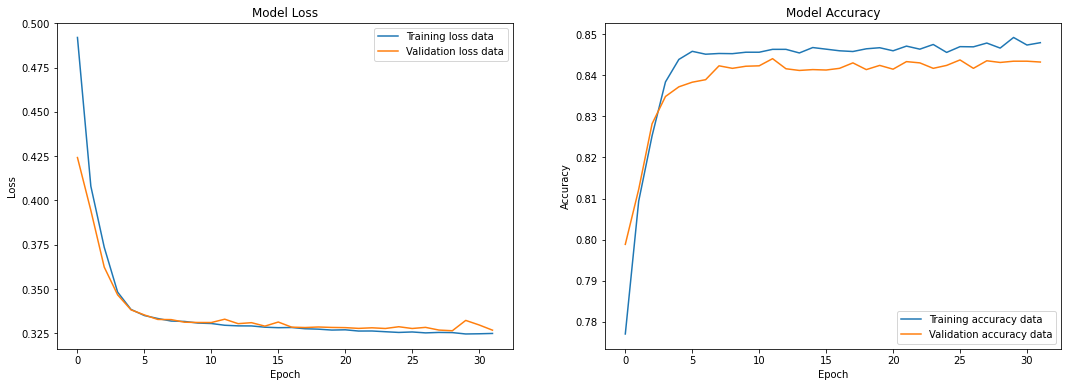

In [ ]:
learning_curve(historyR)